Problem Statement 2: For Question2 either use read_csv if file is csv ....if file is excel then use read_excel\
Chandrashekhar wants to purchase office-space. He does a detailed survey of the offices and corporate complexes in the area, and tries to quantify a lot of factors, such as the distance of the offices from residential and other commercial areas, schools and workplaces; the reputation of the construction companies and builders involved in constructing the apartments; the distance of the offices from highways, freeways and important roads; the facilities around the office space and so on.\
Each of these factors are quantified, normalized and mapped to values on a scale of 0 to 1. Chandrashekhar then makes a table. Each row in the table corresponds to Chandrashekhar Observations for a particular house. If Chandrashekhar has observed and noted F features, the row contains F values separated by a single space, followed by the office-space price in dollars/square-foot. If Chandrashekhar makes observations for H houses, his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries.\
Chandrashekhar does several such surveys and provides you with the tabulated data. At the end of these tables are some rows which have just F columns (the price per square foot is missing). Your task is to predict these prices. F can be any integer number between 1 and 5, both inclusive.\
There is one important observation which Chandrashekhar has made.\
The prices per square foot, are (approximately) a polynomial function of the features in the observation table. This polynomial always has an order less than 4

Input Format\
The first line contains two space separated integers, F and N. Over here, F is the number of observed features. N is the number of rows for which features as well as price per square-foot have been noted.\
This is followed by a table having F+1 columns and N rows with each row in a new line and each column separated by a single space. The last column is the price per square foot.\
The table is immediately followed by integer T followed by T rows containing F columns.\
Constraints\
1 <= F <= 5\
5 <= N <= 100\
1 <= T <= 100\
0 <= Price Per Square Foot <= 10^6 0 <= Factor Values <= 1\
Output Format\


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns=None

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_excel("/content/drive/MyDrive/ML_test/data_final.xlsx")

In [4]:
df.head()

,0.44,0.68,511.14
0,0.99,0.23,717.10
1,0.84,0.29,607.91
2,0.28,0.45,270.40
3,0.07,0.83,289.88
4,0.66,0.80,830.85


In [5]:
df.shape

(99, 3)

In [6]:
df.describe()

,0.44,0.68,511.14
count,99.000000,99.000000,99.000000
mean,0.551414,0.499899,554.649697
std,0.295124,0.308156,349.052910
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,277.465000
50%,0.570000,0.480000,517.430000
75%,0.825000,0.760000,758.205000
max,1.000000,0.990000,1563.820000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.44    99 non-null     float64
 1   0.68    99 non-null     float64
 2   511.14  99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [9]:
# Independent Variable
x=df.iloc[:,:-1].values
# Dependent vairable
y=df.iloc[:,-1].values

In [10]:
x.shape

(99, 2)

In [22]:
x

array([[0.99, 0.23],
       [0.84, 0.29],
       [0.28, 0.45],
       [0.07, 0.83],
       [0.66, 0.8 ],
       [0.73, 0.92],
       [0.57, 0.43],
       [0.43, 0.89],
       [0.27, 0.95],
       [0.43, 0.06],
       [0.87, 0.91],
       [0.78, 0.69],
       [0.9 , 0.94],
       [0.41, 0.06],
       [0.52, 0.17],
       [0.47, 0.66],
       [0.65, 0.43],
       [0.85, 0.64],
       [0.93, 0.44],
       [0.41, 0.93],
       [0.36, 0.43],
       [0.78, 0.85],
       [0.69, 0.07],
       [0.04, 0.52],
       [0.17, 0.15],
       [0.68, 0.13],
       [0.84, 0.6 ],
       [0.38, 0.4 ],
       [0.12, 0.65],
       [0.62, 0.17],
       [0.79, 0.97],
       [0.82, 0.04],
       [0.91, 0.53],
       [0.35, 0.85],
       [0.57, 0.69],
       [0.52, 0.22],
       [0.31, 0.15],
       [0.6 , 0.02],
       [0.99, 0.91],
       [0.48, 0.76],
       [0.3 , 0.19],
       [0.58, 0.62],
       [0.65, 0.17],
       [0.6 , 0.69],
       [0.95, 0.76],
       [0.47, 0.23],
       [0.15, 0.96],
       [0.01,

In [23]:
len(x)

99

In [25]:
y.shape

(99,)

In [13]:
y

array([ 717.1 ,  607.91,  270.4 ,  289.88,  830.85, 1038.09,  455.19,
        640.17,  511.06,  177.03, 1242.52,  891.37, 1339.72,  169.88,
        276.05,  517.43,  522.25,  932.21,  851.25,  640.11,  308.68,
       1046.05,  332.4 ,  171.85,  109.55,  361.97,  872.21,  303.7 ,
        256.38,  341.2 , 1194.63,  408.6 ,  895.54,  518.25,  638.75,
        301.9 ,  163.38,  240.77, 1449.05,  609.  ,  174.59,  593.45,
        355.96,  671.46, 1193.7 ,  278.88,  411.4 ,   42.08,  166.19,
         58.62,  642.45,  368.14,  702.78,  615.74,  143.79,  109.  ,
        328.28,  205.16, 1360.49,  905.83,  487.33,  202.76,  202.01,
        148.87,  745.3 ,  503.04, 1563.82,  165.21,  438.4 ,   98.47,
        819.63,  174.44,  483.13,  534.24,  572.31,  957.61,  518.29,
       1143.49, 1211.31,  784.74,  283.7 ,  684.38,  719.46,  292.23,
        775.68,  130.77,  801.6 ,  323.55,  726.9 ,  661.12,  771.11,
       1016.14,  237.69,  325.89,  636.22,  272.12,  696.65,  434.53,
        593.86])

In [36]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=0.25,random_state = 42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [38]:
pol_reg=PolynomialFeatures(degree=4)
x_train=pol_reg.fit_transform(x_train)
x_test=pol_reg.fit_transform(x_test)

In [39]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [46]:
y_preds=model.predict(x_test)
y_pred=y_preds.tolist()
y_test1=y_test.tolist()

for i in range(len(y_pred)):
  print(round(y_pred[i],2)," = ",y_test1[i])

202.89  =  202.01
171.21  =  174.59
271.06  =  272.12
840.77  =  851.25
431.26  =  434.53
771.67  =  775.68
744.43  =  745.3
361.28  =  355.96
1244.81  =  1242.52
720.01  =  717.1
407.83  =  408.6
513.17  =  518.29
43.71  =  42.08
877.0  =  872.21
1200.16  =  1193.7
830.04  =  830.85
329.93  =  332.4
1331.19  =  1339.72
731.5  =  726.9
531.08  =  534.24
57.83  =  58.62
828.37  =  819.63
437.37  =  438.4
519.54  =  517.43
595.51  =  609.0


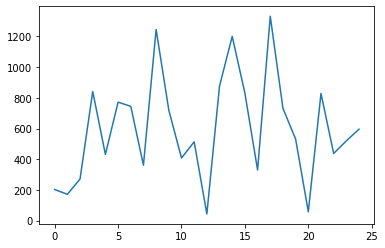

In [47]:
plt.plot(y_preds)

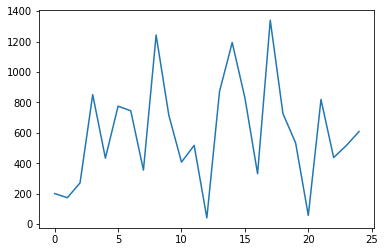

In [48]:
plt.plot(y_test)

In [49]:
model.coef_

array([   0.        ,  145.91890015,  143.78502276,  242.7137763 ,
        483.76408501,  219.76693948,  106.29864174,  173.34027215,
         29.17558386, -192.72313563,    5.80904575,  -25.21084486,
         55.01048332,   62.17651736,  105.14874618])

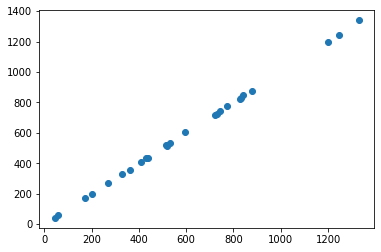

In [50]:
plt.scatter(y_pred,y_test)